## K-Means Clustering: Analyzing Attributes of Patients

## What is K-Means Clustering?

**K-Means Clustering** is a way to group data into clusters based on how similar the items are. It works by picking k centers, then assigning each point to the closest center. The centers keep moving until the groups stop changing. It’s like organizing a group of people into teams based on who’s standing closest together.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder

## Our Task
We will implement k-means clustering to group patients based on their attributes, potentially discovering natural groupings in attributes that may have pose a trend in heart disease occurrence.


##  Load and Preprocess the Hearts Dataset
We will use the `hearts` dataset and classify a patient as either **Has Heart Disease**(label=1) or **Does not have Heart Disease**(label=0)

We'll also drop any rows with missing values.

## Normalize and Prepare Features
Logistic regression works best when the input features are on a similar scale. We'll normalize the features to have mean 0 and standard deviation 1.

In [2]:
# Load and process the heart dataset 
data = pd.read_csv("/Users/kene_2x/Desktop/CMOR 438: DS and Machine Learning/Untitled/Kene_CMOR_438_Spring_25/data/heart.csv")
hearts = data.copy(deep = True)

le = LabelEncoder()#Label Encoding

#Label Encode all Categorical data
hearts['Sex'] = le.fit_transform(hearts['Sex'])
hearts['ChestPainType'] = le.fit_transform(hearts['ChestPainType'])
hearts['RestingECG'] = le.fit_transform(hearts['RestingECG'])
hearts['ExerciseAngina'] = le.fit_transform(hearts['ExerciseAngina'])
hearts['ST_Slope'] = le.fit_transform(hearts['ST_Slope'])

mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization

#Normalize Oldpeak and Standardize the rest of the numerical data
hearts['Oldpeak'] = mms.fit_transform(hearts[['Oldpeak']])
hearts['Age'] = ss.fit_transform(hearts[['Age']])
hearts['RestingBP'] = ss.fit_transform(hearts[['RestingBP']])
hearts['Cholesterol'] = ss.fit_transform(hearts[['Cholesterol']])
hearts['MaxHR'] = ss.fit_transform(hearts[['MaxHR']])
hearts.head

<bound method NDFrame.head of           Age  Sex  ChestPainType  RestingBP  Cholesterol  FastingBS  \
0   -1.433140    1              1   0.410909     0.825070          0   
1   -0.478484    0              2   1.491752    -0.171961          0   
2   -1.751359    1              1  -0.129513     0.770188          0   
3   -0.584556    0              0   0.302825     0.139040          0   
4    0.051881    1              2   0.951331    -0.034755          0   
..        ...  ...            ...        ...          ...        ...   
913 -0.902775    1              3  -1.210356     0.596393          0   
914  1.536902    1              0   0.627078    -0.053049          1   
915  0.370100    1              0  -0.129513    -0.620168          0   
916  0.370100    0              1  -0.129513     0.340275          0   
917 -1.645286    1              2   0.302825    -0.217696          0   

     RestingECG     MaxHR  ExerciseAngina   Oldpeak  ST_Slope  HeartDisease  
0             1  1.382928  

## Features Selection 
Unlike the **Supervised Learning** techniques, unsupervised learning finds natural groupings or trends in data. Hence we do not need to test with **HeartDisease** values.

To better understand why we selected these specific features for classification, read the **Perceptron_hearts** file.

In [5]:
features = [
    "Age", "Oldpeak", "MaxHR", "ST_Slope", "ExerciseAngina", "Sex","ChestPainType","Cholesterol","FastingBS"
]
filtered_df= hearts[features].reset_index(drop=True)
X = filtered_df.values
X.shape

(918, 9)

In [6]:
import sys
sys.path.append("../")  # so it can see the package

## Implementation of the K-Means Clustering Algorithm

Here we will be using the python package I created. That is my_ml.k_means which can be found in my_ml folder

In [7]:
from my_ml.k_means import KMeans

# Initialize and fit KMeans
kmeans = KMeans(num_clusters=2)
labels = kmeans.fit(X)

## Cluster Graph

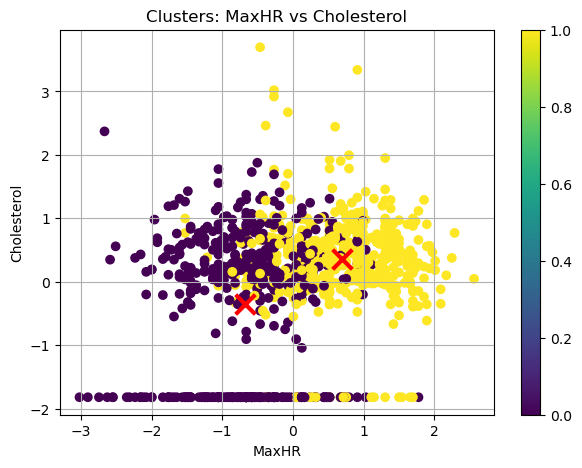

In [8]:
def plot_clusters(X, labels, centroids, feature_names, feat_idx1=0, feat_idx2=1, title=None):
    """
    Plot KMeans clusters using any two feature indices.
    
    Parameters:
    - X: np.ndarray, shape (n_samples, n_features)
    - labels: list or array of cluster labels
    - centroids: np.ndarray of shape (k, n_features)
    - feature_names: list of all feature names
    - feat_idx1: int, index of feature to plot on x-axis
    - feat_idx2: int, index of feature to plot on y-axis
    - title: optional title string
    """
    plt.figure(figsize=(7, 5))
    scatter = plt.scatter(X[:, feat_idx1], X[:, feat_idx2], c=labels, cmap='viridis')
    plt.scatter(centroids[:, feat_idx1], centroids[:, feat_idx2],
                c='red', marker='x', s=200, linewidths=3)
    
    plt.title(title if title else f'Clusters: {feature_names[feat_idx1]} vs {feature_names[feat_idx2]}')
    plt.xlabel(feature_names[feat_idx1])
    plt.ylabel(feature_names[feat_idx2])
    plt.colorbar(scatter)
    plt.grid(True)
    plt.show()

i1 = features.index('MaxHR')
i2 = features.index('Cholesterol')
plot_clusters(X, labels, kmeans.centroids, features, feat_idx1=i1, feat_idx2=i2)

In [20]:
# Analyze cluster characteristics
filtered_df.loc[:,'Cluster'] = labels
cluster_means = filtered_df.groupby('Cluster')[features].mean()
print("\nCluster Characteristics:")
print(cluster_means)


Cluster Characteristics:
              Age   Oldpeak     MaxHR  ST_Slope  ExerciseAngina       Sex  \
Cluster                                                                     
0       -0.459308  0.353781  0.720704  1.675057        0.123570  0.679634   
1        0.417292  0.434913 -0.654777  1.076923        0.659044  0.889813   

         ChestPainType  Cholesterol  FastingBS  
Cluster                                         
0             1.311213     0.348669   0.137300  
1             0.299376    -0.316774   0.320166  
